In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from acquire import *
from prepare import *
from nlp_prepare_functions import *
from nlp_modeling_functions import *
from notebook_sounds import *

In [2]:
get_ipython().set_custom_exc((Exception,), play_sound)

In [4]:
links = get_links_to_bills()

In [5]:
df = acquire_bills(links, filename="master_df.csv")

In [6]:
df = df[df.bill_text != "None"]

In [7]:
df = df.sample(3000)

In [8]:
df.bill_text.apply(basic_clean)

14296     body  pre   congressional bills 117th congres...
24182     body  pre   congressional bills 117th congres...
2137      body  pre   congressional bills 116th congres...
7496      body  pre   congressional bills 117th congres...
12351     body  pre   congressional bills 117th congres...
                               ...                        
8259      body  pre   congressional bills 117th congres...
10343     body  pre   congressional bills 117th congres...
3412      body  pre   congressional bills 116th congres...
22252     body  pre   congressional bills 117th congres...
20103     body  pre   congressional bills 117th congres...
Name: bill_text, Length: 3000, dtype: object

In [9]:
#df = prepare_bills_for_processing(df)

In [10]:
df = df[(df.party == "D") | (df.party == "R")]

In [11]:
df.bill_text = df.bill_text.apply(tokenized, tokenize_tool=3)

In [12]:
df.bill_text = df.bill_text.apply(stemmerize_tool, stemmer_type=3)

In [13]:
train, validate, test = train_validate(df, stratify_col = "party")

# Modeling

In [14]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test(train, validate, test, target_col = "party")

In [15]:
X_train, X_val, X_test = vectorize_data(X_train, X_val, X_test, target_col = "bill_text")

                 Model  Accuracy on Train  Accuracy on Validate  Difference
0              XGBoost             0.9519                0.7270        0.22
1        Decision Tree             0.8131                0.6632        0.15
2        Random Forest             0.7789                0.6621        0.12
3                  KNN             0.7643                0.6224        0.14
4  Logistic Regression             0.7057                0.6904        0.02


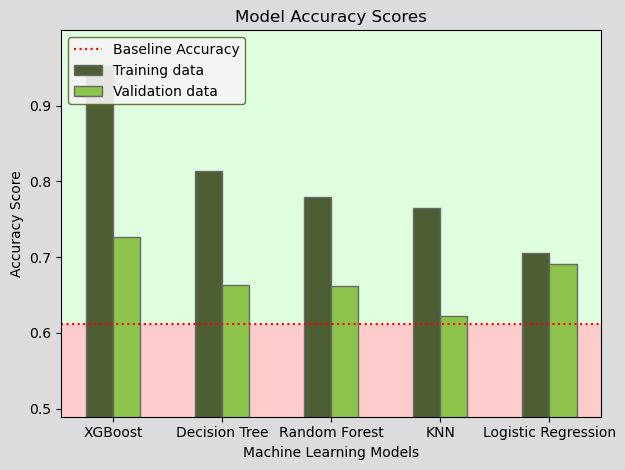

In [16]:
find_model_scores(X_train, y_train, X_val, y_val, metric = 1, print_scores = True)

In [17]:
final_ding()